In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten ,BatchNormalization, MaxPooling2D, Dropout

In [ ]:
#Generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
   directory = '/content/train',
   labels='inferred',
   label_mode = 'int',
   batch_size=32,
   image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/test',
  labels='inferred',
  label_mode ='int',
  batch_size=32,
  image_size=(256,256)

)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize

def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout (0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:

model.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=1,validation_data=validation_ds)

 24/625 [>.............................] - ETA: 1:19:19 - loss: 5.5479 - accuracy: 0.5208

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

KeyError: 'loss'

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

KeyError: 'loss'

In [ ]:
#need to reduce complexity
#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/CAT.jpg')

TypeError: Image data of dtype object cannot be converted to float

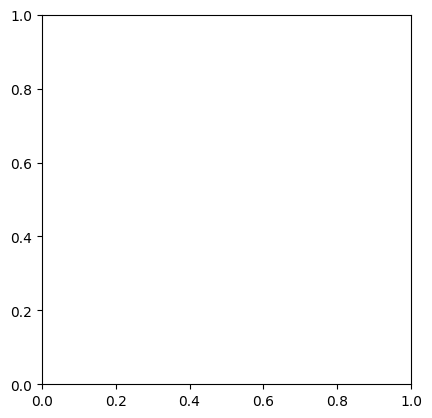

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
test_image = cv2.resize(test_image, (256,256))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
test_input = test_image.reshape(1,256,256,3)

AttributeError: 'NoneType' object has no attribute 'reshape'

In [ ]:
# Cat=0 ; Dog=1
model.predict(test_input)

NameError: name 'test_input' is not defined